<a href="https://colab.research.google.com/github/akansham92/Jupitercodeworld/blob/main/UnsupervisedMachineL(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

San José State University

Department of Applied Data Science

DATA 220

Mathematical Methods for Data Analysis

Instructor: Robert Nicholson

Assignment #9

100 Points

# Supervised and unsupervised machine learning
In this assignment, you will perform both supervised and unsupervised machine learning using Python’s Scikit-learn (sklearn) module. Explore and try different operations, since Python makes it easy to experiment.

Unsupervised ML

Choose a suitable unlabeled dataset that has at least several hundred data points. You can choose a labeled dataset and just ignore the labels for this part of the assignment. Clean and transform the data as necessary, and then load it into a Python data structure.
Use what we did in class with the Iris dataset as a guide:
• Visualize the dataset with a grid of graphs that each plots one data attribute against another. (You do not have to involve all the attributes if there are more than four or five.)
• Perform dimensionality reduction down to two dimensions using both the TSNE and the PCA estimators. Create scatter plots and compare the results of the two estimators and decide which is better (i.e., produces well-separated clusters).
• Perform k-means clustering. If you started with unlabeled data, you may need to experiment with different values of k. Your graphs of the dimensionally reduced data can help you choose k.
Even though this part of the assignment is unsupervised ML which normally works with unlabeled data, it’s OK to “cheat” by using labeled data instead and ignoring the labels during k-means clustering. Then you’ll be able to measure how well the clusters match the labels.
After you’ve performed the k-means clustering, you can label each data point with the cluster to which it was assigned. Now you have labeled data. If you started with labeled data, you can compare the actual labels with your assigned labels.

# Block 1: Importing necessary libraries and loading the dataset

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()

# Get the data from the dataset
X = digits.data

The code imports the required libraries such as pandas, numpy, matplotlib.pyplot, seaborn, and various modules from the sklearn library. It then imports the load_digits function from the sklearn.datasets module, which is used to load the digits dataset. The load_digits function returns a dataset that contains images of hand-written digits.
After loading the dataset, the code retrieves the data from the dataset by accessing the data attribute of the loaded digits dataset. The data represents the features or attributes of the images of the digits. It is assigned to the variable X for further processing.

"Digits" dataset contains 1,797 data points.

In [48]:
X.shape

(1797, 64)

X.shape gives the shape of the X array, which represents the features or attributes of the images of the digits.
The shape of X is a tuple that contains two values: the number of samples and the number of features. The number of samples corresponds to the number of images in the dataset, and the number of features represents the number of attributes or measurements associated with each image.
By executing X.shape, you will obtain the dimensions of the X array, where the first value represents the number of samples and the second value represents the number of features.

Block 2: Standardizing the dataset

In [49]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standardization to the feature data
X_scaled = scaler.fit_transform(X)

# Print the scaled feature data
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

The code imports the StandardScaler class from the sklearn.preprocessing module, which is used to perform feature scaling. Feature scaling is a technique used to standardize the range of features or attributes of a dataset.
After importing the required class, an instance of StandardScaler is created and assigned to the variable scaler. This instance will be used to transform the feature data.
The fit_transform method of the StandardScaler object is then called on the X array. This method fits the scaler to the data and applies the transformation to the feature data, resulting in the scaled feature data. The scaled feature data is assigned to the variable X_scaled.
Finally, the code prints the X_scaled array, which contains the scaled feature data.

Block 3: Visualizing the dataset with a grid of graphs

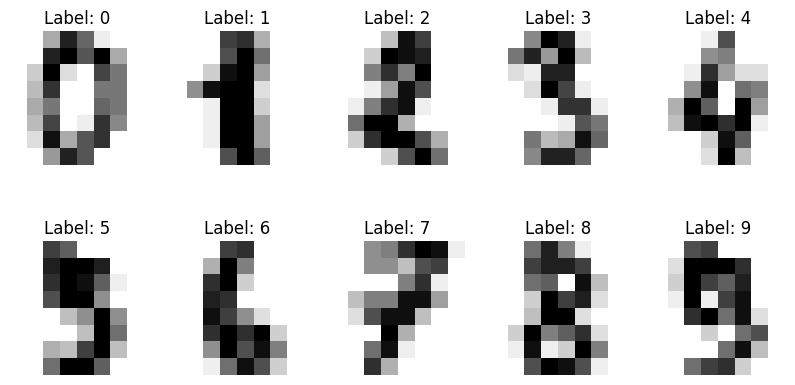

In [50]:
# As the dataset has 64 features, creating a grid of graphs is not practical.
# However, you can visualize a few samples of the images in the dataset.

# Create a figure and axes to display the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate over the axes, images, and labels
for ax, img, label in zip(axes.ravel(), digits.images, digits.target):
    # Display the image on the current axis
    ax.imshow(img, cmap=plt.cm.gray_r)

    # Turn off the axis labels
    ax.axis('off')

    # Set the title of the current axis with the label value
    ax.set_title(f'Label: {label}')

# Show the plot with the images
plt.show()

The code first imports the necessary libraries, matplotlib.pyplot for visualization and load_digits from sklearn.datasets to load the digits dataset.
After loading the dataset, a figure and axes are created using plt.subplots. The figsize parameter sets the size of the figure.
The code then iterates over the axes, images, and labels using the zip function. The ravel() method is used to flatten the axes array, making it easier to iterate over.
Within the loop, each image is displayed on its corresponding axis using ax.imshow. The colormap plt.cm.gray_r is used to display the images in grayscale.
The axis labels are turned off using ax.axis('off') to remove the coordinate axes.
The title of each axis is set to the corresponding label value using ax.set_title.
Finally, the plot with the images is displayed using plt.show().

Block 4: Dimensionality reduction with PCA and TSNE

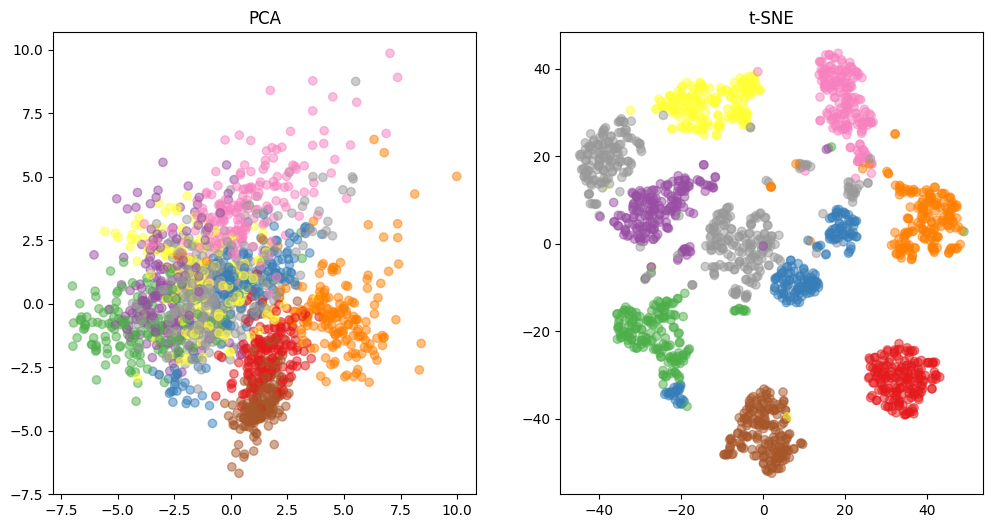

In [51]:
# Create an instance of PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled feature data
X_pca = pca.fit_transform(X_scaled)

# Create an instance of TSNE with 2 components and random state 42
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the scaled feature data
X_tsne = tsne.fit_transform(X_scaled)

# Create a figure and two subplots for the scatter plots of PCA and t-SNE results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of PCA results
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap=plt.cm.Set1, alpha=0.5)
ax1.set_title('PCA')

# Scatter plot of t-SNE results
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap=plt.cm.Set1, alpha=0.5)
ax2.set_title('t-SNE')

# Display the plot
plt.show()

An instance of PCA with 2 components is created using PCA(n_components=2). PCA is then applied to the scaled feature data, X_scaled, using the fit_transform method.
Similarly, an instance of t-SNE with 2 components and random state 42 is created using TSNE(n_components=2, random_state=42). t-SNE is applied to the scaled feature data using the fit_transform method.
A figure with two subplots is created using plt.subplots(1, 2, figsize=(12, 6)). The subplots are assigned to ax1 and ax2, representing the scatter plots for PCA and t-SNE results, respectively.
The scatter plot for PCA results is created using ax1.scatter with the first and second components of X_pca as the x and y coordinates, respectively. The c=digits.target assigns colors based on the target values of the dataset. The colormap plt.cm.Set1 is used, and alpha=0.5 sets the transparency level. The title of the subplot is set to 'PCA' using ax1.set_title.
Similarly, the scatter plot for t-SNE results is created using ax2.scatter, with the first and second components of X_tsne as the x and y coordinates, respectively. The other parameters are set similarly to the PCA scatter plot. The title of the subplot is set to 't-SNE' using ax2.set_title.
Finally, the plot is displayed using plt.show().


Block 5: K-means clustering

In [52]:
# Number of clusters, you can experiment with different values of k
# Define the number of clusters
k = 10

# Create an instance of KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the scaled feature data
kmeans.fit(X_scaled)

# Obtain the cluster labels for each sample
cluster_labels = kmeans.labels_

# Create a new DataFrame using the original digit data
digits_df = pd.DataFrame(digits.data)

# Add the cluster labels as a new column in the DataFrame
digits_df['Cluster'] = cluster_labels

# Display the DataFrame with the cluster labels
digits_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,3
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,3
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,7
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,7
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,3
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,7


The variable k is defined to represent the desired number of clusters.
An instance of the KMeans algorithm is created, specifying the number of clusters as k and setting the random state to 42.
The KMeans model is then fitted to the scaled feature data X_scaled using the fit method.
The cluster labels for each sample are obtained using the labels_ attribute of the KMeans object.
A new DataFrame called digits_df is created using the original digit data digits.data.
The cluster labels are added to the DataFrame as a new column named 'Cluster' using digits_df['Cluster'] = cluster_labels.
Finally, the DataFrame with the cluster labels is displayed, showing the original digit data along with the assigned cluster labels.


Block 6: Comparing the clusters with the actual labels (optional, if the dataset is labeled

In [53]:
# Function to map cluster labels to original target labels
def map_cluster_to_label(cluster_labels, target_labels):
    label_map = {}  # Initialize an empty dictionary to store label mappings
    for i in range(np.max(cluster_labels) + 1):
        # Get unique target labels and their counts for samples in the current cluster
        unique, counts = np.unique(target_labels[cluster_labels == i], return_counts=True)
        # Map the cluster label to the target label with the highest count
        label_map[i] = unique[np.argmax(counts)]
    return label_map

# Map cluster labels to target labels using the custom function
label_map = map_cluster_to_label(cluster_labels, digits.target)

# Create an array of mapped labels based on the cluster labels
mapped_labels = np.array([label_map[label] for label in cluster_labels])

# Calculate accuracy by comparing mapped labels with the original target labels
accuracy = np.sum(mapped_labels == digits.target) / len(digits.target)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.6210350584307178


The code defines a function called map_cluster_to_label that takes cluster_labels and target_labels as input to map the cluster labels to the original target labels. The function uses a dictionary label_map to store the mapping between cluster labels and target labels.

Within the function, a loop iterates over each unique cluster label using range(np.max(cluster_labels) + 1). For each cluster label, it retrieves the target labels of samples in that cluster using boolean indexing target_labels[cluster_labels == i]. The np.unique function is then used to get the unique target labels and their counts in the current cluster.

The label with the highest count is determined using np.argmax(counts), and the cluster label is mapped to this target label in the label_map dictionary.
After defining the function, it is called to map the cluster labels to target labels, and the resulting mapping is stored in the label_map variable.
To calculate accuracy, an array of mapped labels is created by iterating over cluster_labels and using the label_map dictionary to obtain the corresponding target label for each cluster label.

The accuracy is calculated by comparing the mapped labels with the original target labels. The number of matching labels is divided by the total number of labels to get the accuracy value.

Finally, the accuracy value is printed using print(f'Accuracy: {accuracy}').